In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count. 
len(cities)

616

In [6]:
# 6.2.6 Import dependencies
import requests 
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | sur
Processing Record 5 of Set 1 | terney
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | miraflores
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | half moon bay
Processing Record 11 of Set 1 | havre-saint-pierre
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | ullapool
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | kuytun
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | baijiantan
Processing Record 21 of Set 1 | pevek
Processing Reco

Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | rantoul
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | fort-shevchenko
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | hanna
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | kuching
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | raudeberg
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | guajara-mirim
City not found. Skipping...
Processing Record 6 of Set 5 | miles city
Processing Record 7 of Set 5 | kloulklubed
Processing Record 8 of Set 5 | san patricio
Pr

Processing Record 23 of Set 8 | kitsuki
Processing Record 24 of Set 8 | jieshi
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | makaha
Processing Record 28 of Set 8 | shakawe
Processing Record 29 of Set 8 | mehamn
Processing Record 30 of Set 8 | safaga
Processing Record 31 of Set 8 | visnes
Processing Record 32 of Set 8 | mildura
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | sulangan
Processing Record 35 of Set 8 | atherton
Processing Record 36 of Set 8 | bure
Processing Record 37 of Set 8 | lebork
Processing Record 38 of Set 8 | limulunga
Processing Record 39 of Set 8 | thompson
Processing Record 40 of Set 8 | moose factory
Processing Record 41 of Set 8 | acin
City not found. Skipping...
Processing Record 42 of Set 8 | margate
Processing Record 43 of Set 8 | witu
Processing Record 44 of Set 8 | hokitika
Processing Record 45 of Set 8 | richards bay
Processing Record 46 of Set 8 | acajut

Processing Record 14 of Set 12 | novoagansk
Processing Record 15 of Set 12 | la ronge
Processing Record 16 of Set 12 | warangal
Processing Record 17 of Set 12 | kondopoga
Processing Record 18 of Set 12 | amahai
Processing Record 19 of Set 12 | pingliang
Processing Record 20 of Set 12 | mangan
Processing Record 21 of Set 12 | tarudant
City not found. Skipping...
Processing Record 22 of Set 12 | raymond
Processing Record 23 of Set 12 | comodoro rivadavia
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | majene
Processing Record 26 of Set 12 | tual
Processing Record 27 of Set 12 | tanda
Processing Record 28 of Set 12 | loandjili
Processing Record 29 of Set 12 | bosaso
Processing Record 30 of Set 12 | general pico
Processing Record 31 of Set 12 | ostrovnoy
Processing Record 32 of Set 12 | bulgan
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | pangody
Processing Record 35 of Set 12 | beliator
Processing Record 36 of Set 12 | verkh-suetka
Processin

In [10]:
len(city_data)

568

In [11]:
# 6.2.7 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,84.11,83,43,6.69,JP,2021-07-29 22:34:21
1,Bredasdorp,-34.5322,20.0403,51.12,82,3,6.91,ZA,2021-07-29 22:34:21
2,Sur,22.5667,59.5289,91.38,51,100,16.80,OM,2021-07-29 22:34:22
3,Terney,45.0503,136.6092,76.62,78,95,3.27,RU,2021-07-29 22:34:22
4,Rikitea,-23.1203,-134.9692,71.74,76,34,6.85,PF,2021-07-29 22:34:23
5,Miraflores,19.2167,-98.8083,77.04,70,98,2.46,MX,2021-07-29 22:34:23
6,Mahebourg,-20.4081,57.7000,68.29,83,75,21.85,MU,2021-07-29 22:34:23
7,Half Moon Bay,37.4636,-122.4286,97.92,62,40,12.66,US,2021-07-29 22:34:23
8,Havre-Saint-Pierre,50.2334,-63.5986,62.96,59,75,9.22,CA,2021-07-29 22:34:24
9,Nanortalik,60.1432,-45.2371,46.15,84,92,15.84,GL,2021-07-29 22:34:24


In [12]:
# Reorder the Columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-07-29 22:34:21,35.1333,140.3000,84.11,83,43,6.69
1,Bredasdorp,ZA,2021-07-29 22:34:21,-34.5322,20.0403,51.12,82,3,6.91
2,Sur,OM,2021-07-29 22:34:22,22.5667,59.5289,91.38,51,100,16.80
3,Terney,RU,2021-07-29 22:34:22,45.0503,136.6092,76.62,78,95,3.27
4,Rikitea,PF,2021-07-29 22:34:23,-23.1203,-134.9692,71.74,76,34,6.85
5,Miraflores,MX,2021-07-29 22:34:23,19.2167,-98.8083,77.04,70,98,2.46
6,Mahebourg,MU,2021-07-29 22:34:23,-20.4081,57.7000,68.29,83,75,21.85
7,Half Moon Bay,US,2021-07-29 22:34:23,37.4636,-122.4286,97.92,62,40,12.66
8,Havre-Saint-Pierre,CA,2021-07-29 22:34:24,50.2334,-63.5986,62.96,59,75,9.22
9,Nanortalik,GL,2021-07-29 22:34:24,60.1432,-45.2371,46.15,84,92,15.84


In [13]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label= 'City_ID')

In [14]:
# 6.3.1 Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

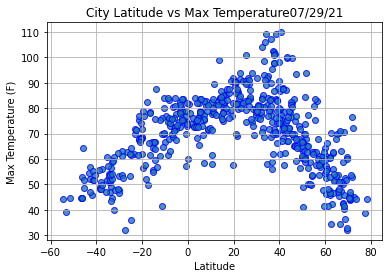

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor = 'b', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Max Temperature'+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

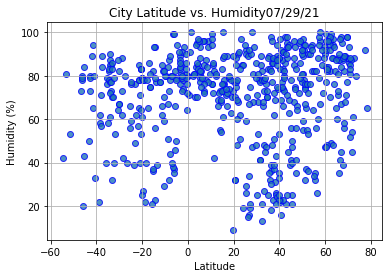

In [16]:
# 6.3.2 Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor = 'b', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity'+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

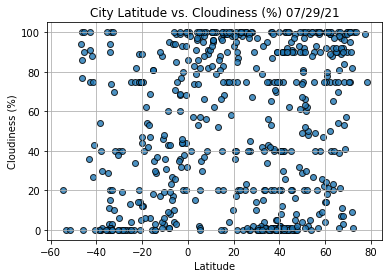

In [17]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

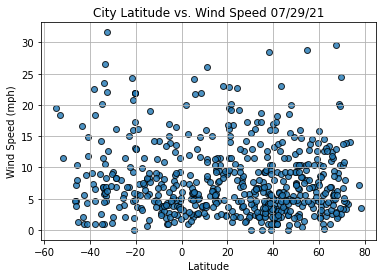

In [18]:
# 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# 6.4.2 Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Example using loc method to get index
index13 = city_data_df.loc[13]
index13

City                    Kavaratti
Country                        IN
Date          2021-07-29 22:34:26
Lat                       10.5669
Lng                        72.642
Max Temp                    82.33
Humidity                       76
Cloudiness                    100
Wind Speed                  15.97
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-07-29 22:34:21,35.1333,140.3000,84.11,83,43,6.69
2,Sur,OM,2021-07-29 22:34:22,22.5667,59.5289,91.38,51,100,16.80
3,Terney,RU,2021-07-29 22:34:22,45.0503,136.6092,76.62,78,95,3.27
5,Miraflores,MX,2021-07-29 22:34:23,19.2167,-98.8083,77.04,70,98,2.46
7,Half Moon Bay,US,2021-07-29 22:34:23,37.4636,-122.4286,97.92,62,40,12.66


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

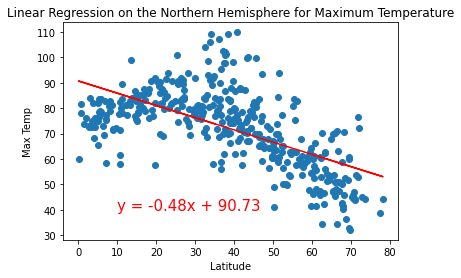

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

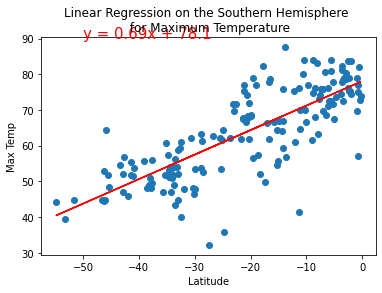

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

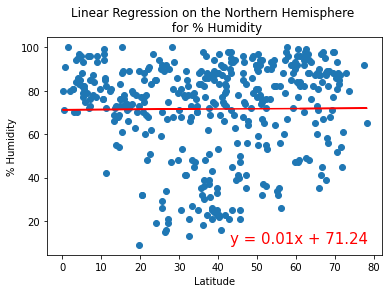

In [25]:
# 6.4.3 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(43,10))

In [26]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=0.008776921187711922, intercept=71.23627350498315, rvalue=0.007859095154705335, pvalue=0.8754872598142881, stderr=0.05597765522725622, intercept_stderr=2.427389755644072)

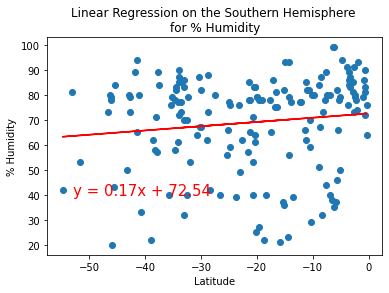

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for % Humidity', '% Humidity',(-53,40))

In [28]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=0.16971973787580433, intercept=72.53649590828022, rvalue=0.12719286120587153, pvalue=0.1003872239984994, stderr=0.10272445152309857, intercept_stderr=2.5917866648542076)

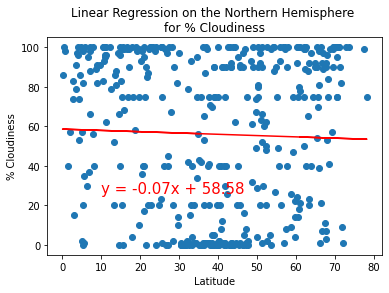

In [29]:
# 6.4.4 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(10,26))

In [30]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=-0.06533099280261181, intercept=58.5813098915577, rvalue=-0.03297775667044944, pvalue=0.5107502314108334, stderr=0.09924767223962806, intercept_stderr=4.303731227896988)

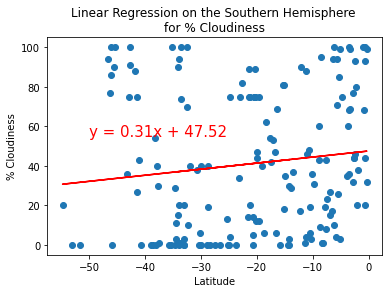

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,55))

In [32]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=0.30670654578808365, intercept=47.51958330894788, rvalue=0.12354264852339855, pvalue=0.11060974453717795, stderr=0.19121073397858498, intercept_stderr=4.824337566711141)

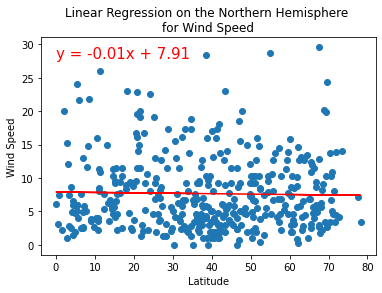

In [33]:
# 6.4.5 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(0,28))

In [34]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=-0.00623479570969858, intercept=7.912943601070396, rvalue=-0.02252989933673273, pvalue=0.6532550241000423, stderr=0.013867915584937544, intercept_stderr=0.6013620271579955)

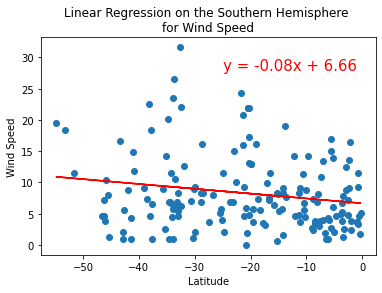

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-25,28))

In [36]:
## Checking r_value
linregress(x_values, y_values)

LinregressResult(slope=-0.07730021062857415, intercept=6.66123351642044, rvalue=-0.18304165110586085, pvalue=0.017554757041364843, stderr=0.03222379483959604, intercept_stderr=0.8130216371852149)